<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/C1_%EC%84%B1%EB%AF%BC%EC%A7%80_220811_DT_RF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data 분석 일일 과제물 - 의사결정나무 (분류)**

In [168]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [169]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

### **데이터 구성하기**

In [170]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [171]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [172]:
df_raw.loc[df_raw['diagnosis'] == '양성', 'diagnosis'] = 1
df_raw.loc[df_raw['diagnosis'] == '음성', 'diagnosis'] = 0

In [173]:
df_raw['diagnosis'] = df_raw['diagnosis'].astype(int)

In [174]:
print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [175]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

### **자료 불균형 확인하기**

In [176]:
df_raw['diagnosis'].value_counts()

0    212
1    108
Name: diagnosis, dtype: int64

In [177]:
print('diagnosis = 1(양성) 비율 : ', df_raw.value_counts(df_raw['diagnosis'] == 1) / len(df_raw))

diagnosis = 1(양성) 비율 :  diagnosis
False    0.6625
True     0.3375
dtype: float64


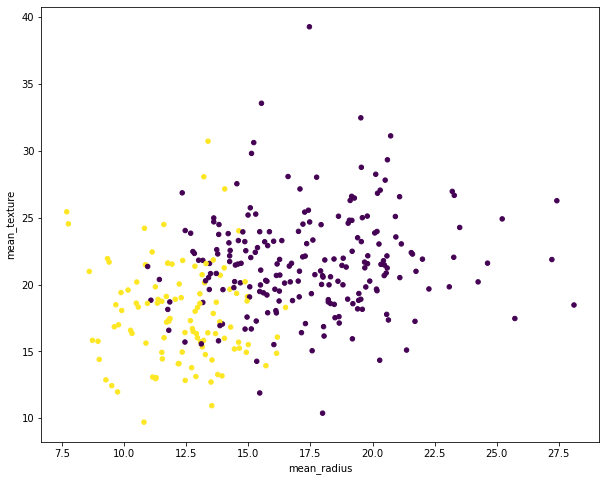

In [186]:
plt.figure(figsize = (10,8))
plt.scatter(df_raw['mean_radius'], df_raw['mean_texture'], c = df_raw['diagnosis'], s= 20)
plt.xlabel('mean_radius'); plt.ylabel('mean_texture')
plt.show()

diagnosis의 양성과 음성의 비율은 각각 1:2이다. 우리의 관심 대상인 양성 여부에 대한 oversampling이 필요해보인다.

In [188]:
sm = SMOTE(sampling_strategy = 'auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print('diagnosis의 전체 자료 개수 : {}'.format(len(df_raw['diagnosis'])))
print('Over-Sampling 후 1 : {}'.format(sum(y_resampled == 1)))
print('Over-Sampling 후 0 : {}'.format(sum(y_resampled == 0)))

diagnosis의 전체 자료 개수 : 320
Over-Sampling 후 1 : 115
Over-Sampling 후 0 : 115


In [192]:
df_resampled = pd.concat([x_resampled, y_resampled], axis = 1)

print(df_resampled.shape)
df_resampled.head()

(230, 31)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,20.50,97.67,677.3,0.1478,0.2256,0.3009,0.09722,0.3849,0.08633,1
1,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,24.17,119.40,915.3,0.1550,0.5046,0.6872,0.21350,0.4245,0.10500,0
2,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,0.1571,0.05478,...,23.17,166.80,1946.0,0.1562,0.3055,0.4159,0.21120,0.2689,0.07055,0
3,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071,1
4,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1


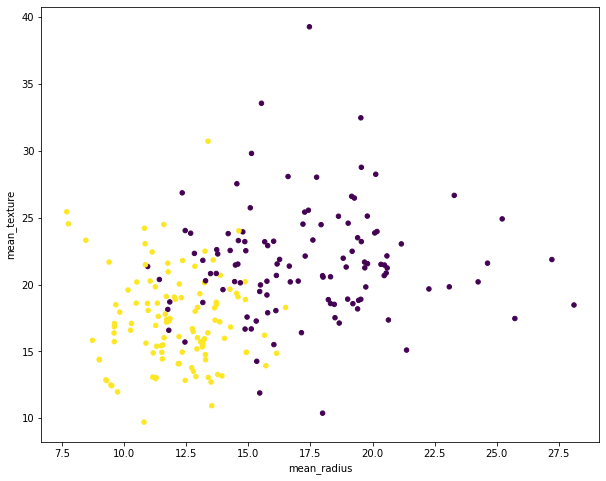

In [193]:
plt.figure(figsize = (10,8))
plt.scatter(df_resampled['mean_radius'], df_resampled['mean_texture'], c = df_resampled['diagnosis'], s= 20)
plt.xlabel('mean_radius'); plt.ylabel('mean_texture')
plt.show()

양성인 데이터와 음성인 데이터가 균형있게 잘 분포되어 있는 것을 확인할 수 있다.

### **데이터 구성하기 : 데이터 분할하기**

In [194]:
# df_raw_x = df_raw.drop('diagnosis',axis = 1)
# df_raw_y = df_raw['diagnosis']

df_raw_x = df_resampled.drop('diagnosis',axis = 1)
df_raw_y = df_resampled['diagnosis']

In [195]:
print(df_raw_x.shape)
df_raw_x.head()

(230, 30)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,14.77,20.50,97.67,677.3,0.1478,0.2256,0.3009,0.09722,0.3849,0.08633
1,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.1550,0.5046,0.6872,0.21350,0.4245,0.10500
2,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,0.1571,0.05478,...,25.37,23.17,166.80,1946.0,0.1562,0.3055,0.4159,0.21120,0.2689,0.07055
3,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
4,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524


In [97]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y, 
                                                                test_size = 0.4, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (192, 30)
df_test_x size : (128, 30)
df_train_y size : (192,)
df_test_y size : (128,)


Over-sampling한 데이터셋 df_resampled를 train : test = 6 : 4 로 분할한다.

### **모델 생성하기**

In [196]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


만들어진 의사결정나무 모델은 train과 test 데이터에 대해 각각 100%, 88.3%의 설명력을 갖는다. train 데이터에 있어서 과대적합되는 현상이 일어난 것으로 보인다.

### **모델 파라미터 설정하기 : max_depth**

In [197]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [198]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


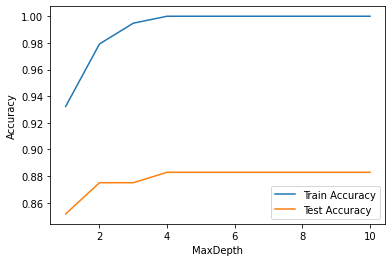

In [199]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()

- 모델의 최대 깊이가 증가하면서 모델의 성능이 향상되지만, 5 이후로는 모델 성능에 변화가 없다.
- TestScore가 0.883이고 TrainScore가 1.000인 **max_depth = 4**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_split**

In [200]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 4,
                                  min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [201]:
df_accuracy_split.round(3)

,MinSampleSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


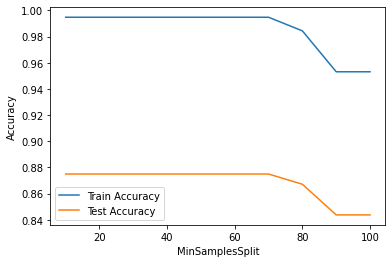

In [202]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가해도 모델의 성능에 변화가 없으며, 80을 넘어서는 순간 모델의 성능이 악화된다.
- TestScore가 0.875이고 TrainScore가 0.995인 **min_samples_split = 10**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_leaf**

In [203]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 4,
                                  min_samples_split = 10,
                                  min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSampleLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [204]:
df_accuracy_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


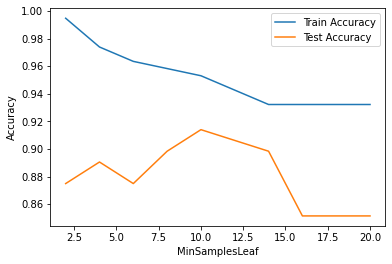

In [205]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델의 성능이 떨어진다.
- TestScore가 0.914이고 TrainScore가 0.953인 **min_samples_leaf = 10**를 파라미터로 설정한다. 

### **최종 모델 선정**

In [118]:
tree_final = DecisionTreeClassifier(max_depth = 4,
                                    min_samples_split = 10,
                                    min_samples_leaf = 10,
                                    random_state = 1234)

tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                       random_state=1234)

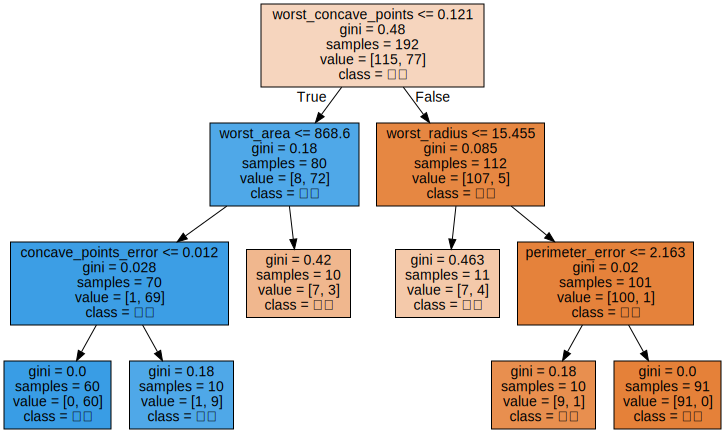

In [207]:
v_feature_name = df_train_x.columns

export_graphviz(tree_final, out_file = 'tree_final.dot', class_names = ['음성', '양성'],
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리 분리에 가장 큰 영향을 주는 변수는 worst_crave_points, worst_area, worst_radius 등이다.
- worst_concave_points <= 0.121 & worst_area <= 868.6 & concave_points_error <= 0.012인 경우 P(Y=양성) = 1
- worst_concave_points > 0.121 & worst_radius > 15.455 & perimeter_error > 2.163 인 경우 P(Y=음성) = 1

### **최종 모델 평가**

In [124]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy : {0:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.914
Confusion Matrix : 
[[94  3]
 [ 8 23]]


분류의 정확도는 약 91.4%이며, 모델이 분류기로서의 역할을 잘 수행한다고 할 수 있다.

In [125]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.922     0.969     0.945        97
           1      0.885     0.742     0.807        31

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



- 1(양성)에 대한 precision이 0.885이다. 양성이라고 예측한 데이터 중 실제 양성에 해당하는 비율이 높으므로 잘 분류되었다고 볼 수 있다.
- 1(양성)에 대한 recall이 0.742이다. 실제 양성 중 양성으로 예측된 비율이 높으므로 잘 분류되었다고 볼 수 있다.
- 1(양성)에 대한 f1 score가 0.807이다. 모델의 전체적인 분류 성능이 좋은 것으로 판단된다.

### **설명변수의 중요도 확인**

In [208]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3).head(5)

,Feature,Importance
27,worst_concave_points,0.861
23,worst_area,0.104
20,worst_radius,0.031
12,perimeter_error,0.002
17,concave_points_error,0.002


Text(0, 0.5, '설명변수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_

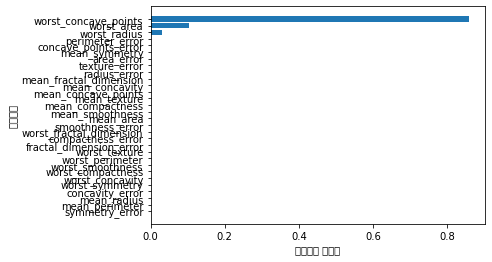

In [128]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))

plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

트리를 생성할 때 worst_concave_points, worst_area, worst_radius 순으로 중요하게 고려된다는 것을 확인할 수 있다.

# **Big Data 분석 일일 과제물 - 랜덤 포레스트 (분류)**

In [209]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

### **데이터 구성하기**

In [210]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [211]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [212]:
df_raw.loc[df_raw['diagnosis'] == '양성', 'diagnosis'] = 1
df_raw.loc[df_raw['diagnosis'] == '음성', 'diagnosis'] = 0

In [213]:
df_raw['diagnosis'] = df_raw['diagnosis'].astype(int)

In [214]:
print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [215]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [223]:
sm = SMOTE(sampling_strategy = 'auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print('diagnosis의 전체 자료 개수 : {}'.format(len(df_raw['diagnosis'])))
print('Over-Sampling 후 1 : {}'.format(sum(y_resampled == 1)))
print('Over-Sampling 후 0 : {}'.format(sum(y_resampled == 0)))

diagnosis의 전체 자료 개수 : 320
Over-Sampling 후 1 : 115
Over-Sampling 후 0 : 115


In [224]:
df_resampled = pd.concat([x_resampled, y_resampled], axis = 1)

print(df_resampled.shape)
df_resampled.head()

(230, 31)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,20.50,97.67,677.3,0.1478,0.2256,0.3009,0.09722,0.3849,0.08633,1
1,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,24.17,119.40,915.3,0.1550,0.5046,0.6872,0.21350,0.4245,0.10500,0
2,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,0.1571,0.05478,...,23.17,166.80,1946.0,0.1562,0.3055,0.4159,0.21120,0.2689,0.07055,0
3,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071,1
4,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1


### **데이터 구성하기 : 데이터 분할하기**

In [226]:
df_raw_x = df_resampled.drop('diagnosis',axis = 1)
df_raw_y = df_resampled['diagnosis']

In [227]:
print(df_raw_x.shape)
df_raw_x.head()

(230, 30)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,...,14.77,20.50,97.67,677.3,0.1478,0.2256,0.3009,0.09722,0.3849,0.08633
1,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.1550,0.5046,0.6872,0.21350,0.4245,0.10500
2,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,0.1571,0.05478,...,25.37,23.17,166.80,1946.0,0.1562,0.3055,0.4159,0.21120,0.2689,0.07055
3,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
4,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524


In [229]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y, 
                                                                test_size = 0.4, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (138, 30)
df_test_x size : (92, 30)
df_train_y size : (138,)
df_test_y size : (92,)


### **모델 생성하기**

In [230]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.989


만들어진 의사결정나무 모델은 train과 test 데이터에 대해 각각 100%, 98.9%의 설명력을 갖는다. train 데이터에 있어서 과대적합되는 현상이 일어난 것으로 보인다.

### **모델 파라미터 설정하기 : n_estimators**

In [231]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(random_state = 1234,
                                n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [232]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.989
1,20,1.0,0.989
2,30,1.0,0.989
3,40,1.0,0.989
4,50,1.0,0.989
5,60,1.0,0.989
6,70,1.0,0.989
7,80,1.0,0.989
8,90,1.0,0.989
9,100,1.0,0.989


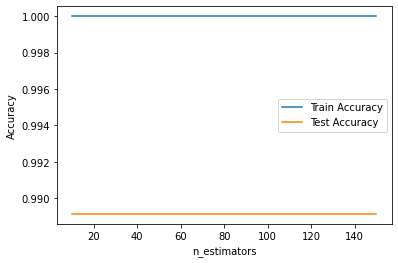

In [233]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('n_estimators')
plt.legend()

- train과 test 데이터에 대해 과대적합이 발생하는 것으로 보인다.
- TestScore가 0.989이고 TrainScore가 1.000인 **n_estimators = 10**를 파라미터로 설정한다. 

In [265]:
## oob error 변화 확인하기

oob_error = []

for v_n_estimator in range(1,151) :
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

Text(0.5, 0, 'n_estimators')

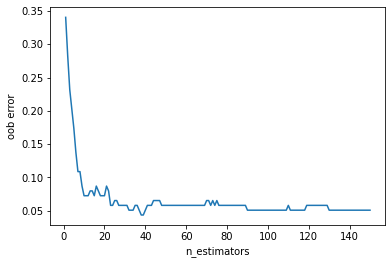

In [267]:
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

생성하려는 결정 트리의 수가 증가할수록 OOB Error가 감소하여 모델의 정확도 또한 증가한다.

### **모델 파라미터 설정하기 : max_depth**

In [234]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(random_state = 1234,
                                  n_estimators = 10,
                                  max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [235]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.949,0.978
1,2,0.978,0.978
2,3,0.986,0.989
3,4,0.993,0.989
4,5,1.000,0.989
5,6,1.000,0.989
6,7,1.000,0.989
7,8,1.000,0.989
8,9,1.000,0.989
9,10,1.000,0.989


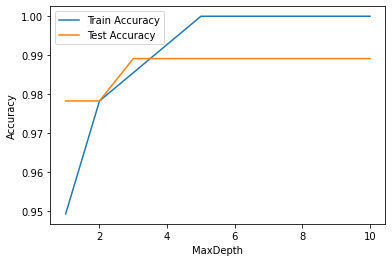

In [236]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()

- 모델의 최대 깊이가 증가하면서 train 데이터에 대해 모델의 성능이 향상된다.
- test 데이터에 대해서는 모델의 성능이 감소하였다가 증가한 후 상태를 유지한다.
- TestScore가 0.989이고 TrainScore가 0.986인 **max_depth = 3**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_split**

In [252]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(random_state = 1234,
                                n_estimators = 10,
                                max_depth = 3,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [253]:
df_accuracy_split.round(3)

,MinSampleSplit,TrainAccuracy,TestAccuracy
0,10,0.986,0.989
1,20,0.978,0.978
2,30,0.978,0.978
3,40,0.964,0.978
4,50,0.942,0.967
5,60,0.949,0.978
6,70,0.949,0.978
7,80,0.949,0.978
8,90,0.913,0.924
9,100,0.522,0.467


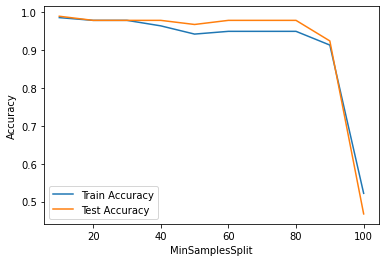

In [254]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가할수록 모델의 성능에 변화가 없다가 80에서 급격하게 감소한다.
- TestScore가 0.989이고 TrainScore가 0.986인 **min_samples_split = 10**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_leaf**

In [255]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(random_state = 1234,
                                n_estimators = 10,
                                max_depth = 3,
                                min_samples_split = 10,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSampleLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [256]:
df_accuracy_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,10,0.957,0.978
1,20,0.957,0.978
2,30,0.949,0.978
3,40,0.935,0.978
4,50,0.522,0.467
5,60,0.522,0.467
6,70,0.522,0.467
7,80,0.522,0.467
8,90,0.522,0.467
9,100,0.522,0.467


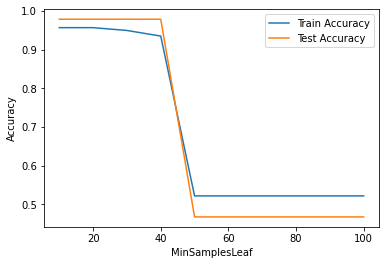

In [257]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델 성능에 변화가 없다가, 60이 되면서 모델 성능이 급격하게 떨어진다.
- TestScore가 0.978이고 TrainScore가 0.935인 **min_samples_leaf = 40**를 파라미터로 설정한다. 

### **최종 모델 선정**

In [262]:
rf_final = RandomForestClassifier(n_estimators = 10,
                                  max_depth = 3,
                                  min_samples_split = 10,
                                  min_samples_leaf = 40,
                                  random_state = 1234)

rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=10,
                       n_estimators=10, random_state=1234)

### **최종 모델 평가**

In [263]:
y_pred = rf_final.predict(df_test_x)
print('Accuracy : {0:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.978
Confusion Matrix : 
[[49  0]
 [ 2 41]]


해당 모델은 약 97.8%의 정확도를 보여준다.

In [264]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.961     1.000     0.980        49
           1      1.000     0.953     0.976        43

    accuracy                          0.978        92
   macro avg      0.980     0.977     0.978        92
weighted avg      0.979     0.978     0.978        92



- 1에 대한 precision이 각각 0.676이다. 양성이라고 예측한 데이터 중 실제 양성에 해당하는 비율이 다소 낮은 것으로 파악된다.
- 1에 대한 recall이 각각 0.742이다. 실제 양성 중 양성으로 분류된 데이터의 개수가 양호한 것으로 보인다.
- 1에 대한 f1 score가 각각 0.708이다. 모델의 전체적인 분류 성능이 양호한 것으로 해석된다.

### **설명변수의 중요도 확인**

In [268]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3).head(5)

,Feature,Importance
22,worst_perimeter,0.2
7,mean_concave_points,0.2
0,mean_radius,0.1
5,mean_compactness,0.1
6,mean_concavity,0.1


Text(0, 0.5, '설명변수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_

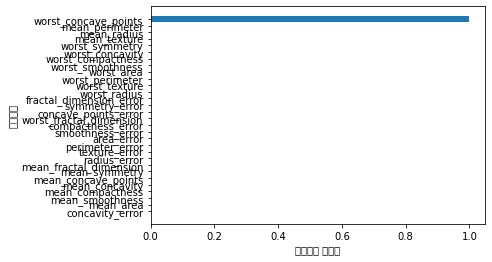

In [167]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))

plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

트리를 생성할 때 worst_concave_points가 중요하게 고려된다는 것을 확인할 수 있다.